In [13]:
import PySimpleGUI as sg

In [17]:
ventana = sg.Window(title='hellow world', layout=[[]], margins=(100,100))
ventana.read()

(None, [])

In [3]:
import PySimpleGUI as sg
layout = [
        [sg.Text('Hello from Lima')],
        [sg.Button('ok')]
        ]

#creando una ventana
ventana = sg.Window(title='hellow world', layout=layout, margins=(100,100))

while True:
    event, values = ventana.read()
    if event == 'ok' or event == sg.WINDOW_CLOSED:
        break

ventana.close()


## Integrating Matplotlib With PySimpleGUI

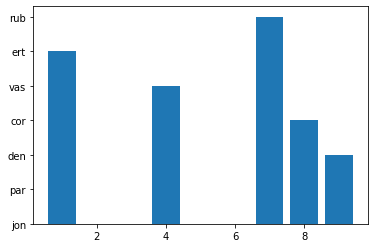

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import PySimpleGUI as sg

x = [4,7,9,8,4,1,7]
y = ['jon', 'par', 'den', 'cor', 'vas', 'ert', 'rub']

plt.bar(x, y)
plt.show()

In [14]:
sg.theme('DarkAmber')   # Add a touch of color
# All the stuff inside your window.
layout = [  [sg.Text('Some text on Row 1')],
            [sg.Text('Enter something on Row 2'), sg.InputText()],
            [sg.Button('Ok'), sg.Button('Cancel')] ]

# Create the Window
window = sg.Window('Window Title', layout)
# Event Loop to process "events" and get the "values" of the inputs
while True:
    event, values = window.read()
    if event == sg.WIN_CLOSED or event == 'Cancel': # if user closes window or clicks cancel
        break
    print('You entered ', values[0])

window.close()

In [1]:
import PySimpleGUI as sg                        # Part 1 - The import

# Define the window's contents
layout = [  [sg.Text("What's your name?")],     # Part 2 - The Layout
            [sg.Input()],
            [sg.Button('Ok')] ]

# Create the window
window = sg.Window('Window Title', layout)      # Part 3 - Window Defintion
                                                
# Display and interact with the Window
event, values = window.read()                   # Part 4 - Event loop or Window.read call

# Do something with the information gathered
print('Hello', values[0], "! Thanks for trying PySimpleGUI")

# Finish up by removing from the screen
window.close()                                  # Part 5 - Close the Window

Hello joel ! Thanks for trying PySimpleGUI


In [2]:
import numpy as np
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import PySimpleGUI as sg
import matplotlib

fig = matplotlib.figure.Figure(figsize=(5, 4), dpi=100)
t = np.arange(0, 3, .01)
fig.add_subplot(111).plot(t, 2 * np.sin(2 * np.pi * t))

matplotlib.use("TkAgg")

def draw_figure(canvas, figure):
    figure_canvas_agg = FigureCanvasTkAgg(figure, canvas)
    figure_canvas_agg.draw()
    figure_canvas_agg.get_tk_widget().pack(side="top", fill="both", expand=1)
    return figure_canvas_agg

# Define the window layout
layout = [
    [sg.Text("Plot test")],
    [sg.Canvas(key="-CANVAS-")],
    [sg.Button("Ok")],
]

# Create the form and show it without the plot
window = sg.Window(
    "Matplotlib Single Graph",
    layout,
    location=(0, 0),
    finalize=True,
    element_justification="center",
    font="Helvetica 18",
)

# Add the plot to the window
draw_figure(window["-CANVAS-"].TKCanvas, fig)

event, values = window.read()

window.close()

In [3]:
# img_viewer.py

import PySimpleGUI as sg
import os.path

# First the window layout in 2 columns

file_list_column = [
    [
        sg.Text("Image Folder"),
        sg.In(size=(25, 1), enable_events=True, key="-FOLDER-"),
        sg.FolderBrowse(),
    ],
    [
        sg.Listbox(
            values=[], enable_events=True, size=(40, 20), key="-FILE LIST-"
        )
    ],
]

# For now will only show the name of the file that was chosen
image_viewer_column = [
    [sg.Text("Choose an image from list on left:")],
    [sg.Text(size=(40, 1), key="-TOUT-")],
    [sg.Image(key="-IMAGE-")],
]

# ----- Full layout -----
layout = [
    [
        sg.Column(file_list_column),
        sg.VSeperator(),
        sg.Column(image_viewer_column),
    ]
]